# Numerical Method Project
## Pan Teparak and  Aphisit Areechitsakul

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import math
import os
import colorsys
import operator
from random import choice
%matplotlib inline

In [12]:
def getImageFromFolder(path):
    images = []
    for img in os.listdir(path):
        if ".DS_Store" not in img:
            p = os.path.join(os.path.dirname("."), path, img)
            im = plt.imread(p)
            images.append(Image(im, p))
    return images

images = getImageFromFolder("imgs")
     

# fig, axes = plt.subplots(nrows=1,ncols=3)
# plt.subplot(131)
# plt.imshow(images[1])
# plt.subplot(132)
# plt.imshow(images[2])
# plt.subplot(133)
# plt.imshow(images[0])
# fig.show()




for img in images:
    print(img.image[0][0])

[229 231 134]
[240 246 146]
[246 250 156]
[244 249 159]
[238 245 142]
[247 251 154]
[241 245 148]
[239 245 147]
[237 243 145]
[236 243 148]


In [13]:
def getPixelAtIndex(img, x,  dx,y, dy):
    return img[y:dy,x:dx]

# col = 5
# for i in range(1, len(images) + 1):
#     plt.subplot(len(images)//col + 1, col, i)
#     plt.imshow(getPixelAtIndex(images[i-1].image, 0, 1, 0, 1))

def print_pixel(pixels, col=5):
    for i in range(1, len(pixels) + 1):
        plt.subplot(len(pixels)//col + 1, col, i)
        plt.imshow(pixels[i])


In [14]:
# Should be all true
sample_pixels = [
    (229, 231, 134), (240, 246, 146), (242, 247, 153), (246, 250, 156), (244, 249, 159), (238, 245, 142),
    (247, 251, 154), (241, 245, 148), (239, 245, 147), (237, 243, 145), (239, 245, 145), (236, 243, 148), (0, 0, 0)
]

random_sample = [
    (229, 231, 134), (240, 246, 146), (0, 0, 0), (229, 210, 134), (229, 210, 0)
]

def rgbComparator(pix1, pix2):
    r1, g1, b1 = pix1
    r2, g2, b2 = pix2
    dr = (r2-r1)
    dg = (g2-g1)
    db = (b2-b1)
    return 1 - math.sqrt(dr*dr + dg*dg + db*db) / math.sqrt(195075), 1 - math.sqrt(dr*dr + dg*dg + db*db) / math.sqrt(195075) # 3*(255**2)

def hsvComparator(pix1, pix2):
    h1, s1, v1 = colorsys.rgb_to_hsv(pix1[0], pix1[1], pix1[2])
    h2, s2, v2 = colorsys.rgb_to_hsv(pix2[0], pix2[1], pix2[2])
    
    avghue = (h1 + h2)/2
    h_distance = abs(h1 - avghue)
    
    avgsat = (s1 + s2)/2
    s_distance = abs(s1 - avgsat)
    return 1 - h_distance, 1 - s_distance

print(hsvComparator((229, 231, 134), (240, 246, 146)))
print(hsvComparator((229, 231, 134), (229, 50, 21)))
print(hsvComparator((255, 0, 0), (0, 255, 0)))
print(hsvComparator((229, 231, 134), (0, 0, 0)))


(0.9967182130584192, 0.9932953225636152)
(0.9265670433518371, 0.7558082383409894)
(0.8333333333333334, 1.0)
(0.9149484536082474, 0.7900432900432901)


In [15]:
def tally(imgs):
    for i in range(len(imgs)):
        for j in range(i + 1, len(imgs)-1):
            print(hsvComparator(imgs[i], imgs[j]))
            
tally(random_sample)

(0.9967182130584192, 0.9932953225636152)
(0.9149484536082474, 0.7900432900432901)
(0.9816151202749142, 0.9974668708293163)
(0.9116666666666666, 0.7967479674796748)
(0.9783333333333333, 0.995828451734299)
(0.9333333333333333, 0.7925764192139738)


In [16]:
def compute_all(pixels, acceptable_ratio=0.985):
    n = len(pixels)
    d = {}
    for i in range(n - 1):
        for j in range(i + 1, n):
            h, s = hsvComparator(pixels[i], pixels[j])
            if(h >= acceptable_ratio and s >= acceptable_ratio):
                d[pixels[i]] = d.get(pixels[i], 0) + 1
                d[pixels[j]] = d.get(pixels[j], 0) + 1
    return d

compute_all(sample_pixels)

{(229, 231, 134): 7,
 (236, 243, 148): 11,
 (237, 243, 145): 10,
 (238, 245, 142): 7,
 (239, 245, 145): 9,
 (239, 245, 147): 10,
 (240, 246, 146): 9,
 (241, 245, 148): 10,
 (242, 247, 153): 9,
 (244, 249, 159): 4,
 (246, 250, 156): 7,
 (247, 251, 154): 9}

## Algorithms

1) Read Images 

In [17]:
class Image(object):
    def __init__(self, image_, path_):
        self.image = image_
        self.path = path_
    
    def getDimension(self):
        rows, cols, op  = self.image.shape
        return rows, cols
    
    def getPixelAt(self, x, y, size=1, dx=None, dy=None):
        
        if dx == None and dy == None:
            sx = size
            sy = size
        else:
            assert dx != None
            assert dy != None
            sx = dx
            sy = dy
            
        # TODO: Check if x + dx and y + dy is within shape

            
        return self.image[y:y+dy,x:x+dx]
    
class DifferenceRemover(object):
    def __init__(self, images_):
        assert len(images_) > 1
        self.size = len(images_)
        
        r, c = images_[0].getDimension()
        for i in range(1, self.size):
            dr, dc = images_[i].getDimension()
            assert r == dr and c == dc
            
        self.rows, self.cols = r, c
        self.images = images_
        
    def hsvComparator(self, pix1, pix2):
        h1, s1, v1 = colorsys.rgb_to_hsv(pix1[0], pix1[1], pix1[2])
        h2, s2, v2 = colorsys.rgb_to_hsv(pix2[0], pix2[1], pix2[2])

        avghue = (h1 + h2)/2
        h_distance = abs(h1 - avghue)

        avgsat = (s1 + s2)/2
        s_distance = abs(s1 - avgsat)
        return 1 - h_distance, 1 - s_distance
    
#     def generateTally(self, i, j, acceptable_ratio=0.985):
#         n = len(self.images)
#         d = {}
#         for im1 in range(n-1):
#             for im2 in range(i, n):
#                 pixel1 = tuple(self.images[im1].image[i][j])
#                 pixel2 = tuple(self.images[im2].image[i][j])
                
#                 h, s = self.hsvComparator(pixel1, pixel2)
#                 print(h,s, pixel1, pixel2)
#                 if(h >= acceptable_ratio and s >= acceptable_ratio):
#                     d[pixel1] = d.get(pixel1, 0) + 1
#                     d[pixel2] = d.get(pixel2, 0) + 1
                    
#         if (len(d) == 0):
#             return choice(self.images).image[i][j], None
#         return max(d.items(), key=operator.itemgetter(1))


#     def generateTally(self, pixel_r,pixel_c, acceptable_ratio=0.985):
#         max_count = 0
#         for i in range(self.size):
#             count=0
#             for j in range(self.size):
#                 hval, sval = self.hsvComparator(self.images[i].image[pixel_r,pixel_c],self.images[j].image[pixel_r,pixel_c])
#                 if hval > acceptable_ratio and sval > acceptable_ratio:
#                     count+=1
#             if count > max_count:
#                 max_count = count
#                 save = self.images[i].image[pixel_r,pixel_c]
#         return save

    def generateTally(self, i, j):
#         pixel = [(self.images[im].image[i][j], sum(self.images[im].image[i][j])) for im in range(self.size)]
#         r = [img.image[i,j][0] for img in self.images ]
#         g = [img.image[i,j][1] for img in self.images ]
#         b = [img.image[i,j][2] for img in self.images ]
        r = []
        g = []
        b = []
        
        for img in self.images:
            r.append(img.image[i][j][0])
            g.append(img.image[i][j][1])
            b.append(img.image[i][j][2])
        
        r.sort()
        g.sort()
        b.sort()
        mid = self.size//2
#         plt.hist([p[1] for p in pixel])

    
        return np.array([r[mid], g[mid], b[mid]], dtype=np.uint8)
        
    
    def compute_all(self):
        ret = np.empty((self.rows, self.cols, 3), dtype=np.uint8)
        for r in range(self.rows):
            for c in range(self.cols):
                value = self.generateTally(r, c)
                ret[r,c] = value
        return ret

In [22]:
def getImageFromFolder(path):
    images = []
    for img in os.listdir(path):
        if ".DS_Store" not in img:
            p = os.path.join(os.path.dirname("."), path, img)
            im = plt.imread(p)
            images.append(Image(im, p))
    return images

images = getImageFromFolder("toei")



diff_image = DifferenceRemover(images)

import time

start = time.time()
plt.figure(figsize=(12, 8))
out = diff_image.compute_all()
end = time.time()

print(end - start, "seconds")


1.0443451404571533 seconds


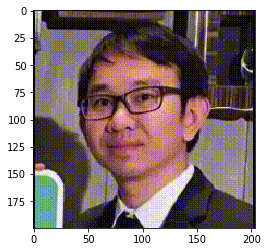

In [23]:
plt.imshow(out)

In [24]:
images2 = getImageFromFolder("imgs")
diff_image = DifferenceRemover(images2)

import time

start = time.time()
out = diff_image.compute_all()
end = time.time()
# plt.imshow(out, origin="lower")
print(end - start, "seconds")

139.91985082626343 seconds


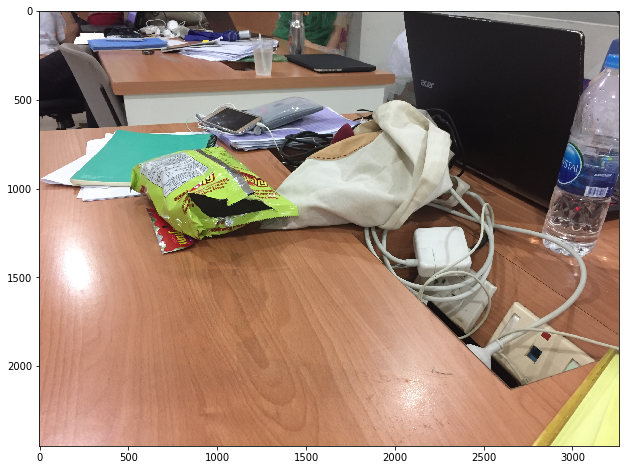

In [32]:
plt.figure(figsize=(12, 8))
# out.T
plt.imshow([o[::-1] for o in out[::-1]])